In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Linear Regression problem
The goal of linear regression is to fit a line to a set of points.

In [2]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [21]:
n=100
x = torch.ones(n,2) # Creates an tensor of 1s
x[:,0].uniform_(-1.,1) # Sets the first column to random values in the interval (-1, 1)
x[:5]

tensor([[ 0.2400,  1.0000],
        [ 0.9550,  1.0000],
        [-0.4101,  1.0000],
        [ 0.8476,  1.0000],
        [-0.6347,  1.0000]])

In [28]:
a = torch.tensor([3., 2]); a
# m = 3, y-intercept = -2

tensor([3., 2.])

In [32]:
print(x.shape, a.shape)
x@a # is matrix multiplication between the two matrixes(tensors) x & a
#(100 x 2) x (2 x 1) = (100, 1)
#In this case for each value what we're calculating is 3x1 + 2*uniform_(-1.,1)
x@a

torch.Size([100, 2]) torch.Size([2])


tensor([ 2.7199,  4.8649,  0.7696,  4.5428,  0.0959,  3.0926,  1.4330,  2.3842,
         1.4086,  4.6865, -0.6977, -0.4386,  4.0985,  3.6655,  4.8550,  3.2611,
         2.9903, -0.2509,  3.1524,  0.2846, -0.2277,  3.8034,  3.6749,  2.7853,
         2.8642,  0.1190, -0.3274,  1.9838,  4.2348,  0.0930, -0.2015,  2.6541,
         3.8076,  1.4211,  1.9446,  2.7933,  4.0534,  4.5831,  0.0921,  4.8251,
         2.4198,  2.9920,  0.4345,  0.9052,  2.2951,  3.6804,  2.2885,  0.3982,
         1.0210,  2.5372,  4.5258,  4.7258,  2.6303, -0.2307, -0.1705,  2.9310,
         0.8481,  4.7847,  4.5662,  2.8052,  4.0257, -0.7661,  0.2643,  2.7902,
         1.5761,  1.5767, -0.3844,  4.1395,  4.6937,  3.9100,  3.8930, -0.6301,
        -0.0863,  1.0670,  1.6920,  0.8471,  1.8215, -0.9203,  1.0120,  0.7116,
        -0.9288,  1.4420,  3.0177,  2.0973,  2.9368,  3.6666,  1.4992,  4.4500,
         1.7055,  3.3523, -0.7512,  3.6105,  1.4786,  4.2969,  0.2241, -0.5612,
        -0.9638,  2.9905, -0.6178,  0.88

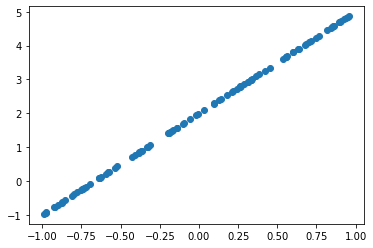

In [37]:
y = x@a
plt.scatter(x[:,0], y);

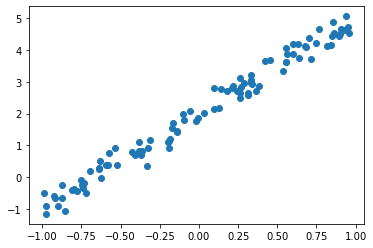

In [38]:
#Adding random variation 
y = x@a + 0.25*torch.randn(n)
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the **mean squared error**.

In [39]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()


Suppose we believe a = (-1.0,1.0) then we can compute y_hat which is our prediction and then compute our error.

In [40]:
a = torch.tensor([-1.,1])

In [41]:
y_hat = x@a
mse(y_hat, y)

tensor(6.6624)

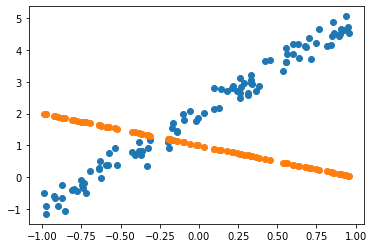

In [42]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the model (linear regression) and the evaluation criteria (or loss function). Now we need to handle optimization; that is, how do we find the best values for a? How do we find the best fitting linear regression

# Gradient Descent
We would like to find the values of a that minimize mse_loss.

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in PyTorch.

In [45]:
a = torch.tensor([-1.,1]) # this is our first inital "guess" for m & c
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [50]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() # Caculates the gradients for all the parameters
    #the wrapper "with torch.no_grad()" temporarily set all the requires_grad flag to false. 
    #this allows us to manually set the updtaed parameters
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_() # this zeros the grad for the next batch, loss.backwards will just add to the current values of the gradient
        #In pytorch the gradient is always stored as an attribute of the weight/bias object

In [51]:
lr = 1e-1
for t in range(100): update()

tensor(0.0629, grad_fn=<MeanBackward0>)
tensor(0.0629, grad_fn=<MeanBackward0>)
tensor(0.0629, grad_fn=<MeanBackward0>)
tensor(0.0629, grad_fn=<MeanBackward0>)
tensor(0.0629, grad_fn=<MeanBackward0>)
tensor(0.0629, grad_fn=<MeanBackward0>)
tensor(0.0629, grad_fn=<MeanBackward0>)
tensor(0.0629, grad_fn=<MeanBackward0>)
tensor(0.0629, grad_fn=<MeanBackward0>)
tensor(0.0629, grad_fn=<MeanBackward0>)


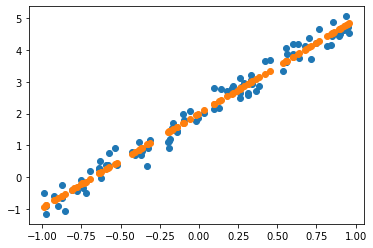

In [52]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

In [53]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [59]:
a = torch.tensor([-1.,1])
a = nn.Parameter(torch.tensor([-1.,1]))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach()) # .detact makes sure this isn't just a reference in memory(I think)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

## SGD visualized
https://gist.github.com/joshfp/71c5b16b1d2adeca9e539beb76030325

In [60]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [61]:
torch.manual_seed(17);
use_gpu = True
n = 100

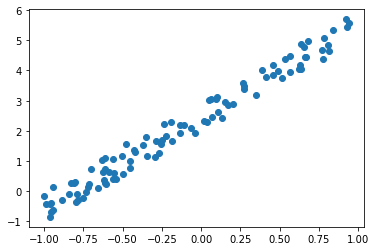

In [62]:
n = 100
x = torch.ones(n, 2)
x[:,0].uniform_(-1., 1);
w_y = torch.tensor([3., 2]); w_y
y = x@w_y + torch.rand(n)
y = y[:,None]
plt.scatter(x[:,0], y);

In [63]:
def mse(y_hat, y): return ((y_hat-y)**2).mean(0)

In [64]:
device = torch.device('cuda') if use_gpu and torch.cuda.is_available() else torch.device('cpu')
x = x.to(device)
y = y.to(device)

In [6]:
# initial weights
w0 = torch.rand(2) * 1000 - 500; w0

tensor([ 214.6787, -491.5229])

In [8]:
#"Stepper SGD" (vanilla SGD)
def train_stepper_sgd(w0, lr, n_epochs=100, min_loss=0.1, verbose=True):
    w = w0[:,None].clone().to(device).requires_grad_()
    if verbose: print('Epoch\tLoss')
    
    for i in range(n_epochs):
        y_hat = x@w
        loss = mse(y, y_hat)
        loss.backward()

        with torch.no_grad():
            w -=  lr * w.grad
            w.grad.zero_()
        if verbose: print(f'{i+1}\t{loss.item():.3f}')
        if loss.item() < min_loss: break
    print(f'Final loss: {loss.item():.3f} in {i+1} epochs.')
    
lr = 0.3
# train_stepper_sgd(w0, lr)

In [9]:
def train_walker_sgd(w0, lrs, n_epochs=100, min_loss=0.1, verbose=True, record=False):
    lrs = torch.tensor(lrs, dtype=torch.float32).to(device)
    n_lrs = lrs.size(0)
    w = w0.repeat(n_lrs, 1).transpose(0,1).clone().to(device).requires_grad_()
    if record: rec = []
    
    if verbose: print('Epoch\tLR\tLoss')
    
    for i in range(n_epochs):
        w_rec = w.data
        y_hat = x@w
        losses = mse(y, y_hat)

        # identify the best learning rate
        bst_lr_idx = losses.argmin()
        bst_loss = losses[bst_lr_idx]    
        bst_loss.backward()

        with torch.no_grad():
            # take the weights of the best lr and copy them over the others lrs,
            # dismissing weights from non-optimal lrs.
            w_grad = w.grad[:,bst_lr_idx].repeat(n_lrs, 1).transpose(0,1)
            w.data = w.data[:,bst_lr_idx].repeat(n_lrs, 1).transpose(0,1)
            w.data -=  lrs * w_grad
            w.grad.zero_()
            
        if record: rec.append((w_rec.to('cpu'), losses.data.to('cpu'), bst_lr_idx.to('cpu')))
        if verbose: print(f'{i+1}\t{lrs[bst_lr_idx].item():.2f}\t{bst_loss.item():.3f}')
        if bst_loss.item() < min_loss: break

    print(f'Final loss: {bst_loss.item():.3f} in {i+1} epochs.')
    if record: 
        rec = list(zip(*rec))
        wgts = np.stack(rec[0])
        loss = np.stack(rec[1])
        best = np.stack(rec[2])
        return wgts, loss, best
    
lrs = np.arange(0.1, 1, 0.1)
train_walker_sgd(w0, lrs);

Epoch	LR	Loss
1	0.80	287112.438
2	0.50	2092.768
3	0.90	459.608
4	0.70	122.471
5	0.80	32.740
6	0.70	8.685
7	0.80	2.412
8	0.70	0.689
9	0.70	0.247
10	0.80	0.126
11	0.70	0.094
Final loss: 0.094 in 11 epochs.


In [10]:
from mpl_toolkits import mplot3d
from matplotlib import animation
plt.rc('animation', html='html5')

In [11]:
def loss_wrt_wgts(w1, w2):
    w = torch.Tensor([w1, w2]).to(device)
    y_hat = x@w
    loss = mse(y_hat[:,None], y)
    return loss.item()
loss_wgts = np.vectorize(loss_wrt_wgts)

w0_range = np.linspace(-20, 20, 50)
w1_range = np.linspace(-20, 20, 50)
mesh = np.meshgrid(w0_range, w1_range)
loss_mesh = loss_wgts(*mesh)

In [12]:
w0 = torch.tensor([-19., -19])
lrs = np.linspace(0.1, 1, 7)
wgts, loss, best  = train_walker_sgd(w0, lrs, record=True)

Epoch	LR	Loss
1	0.55	507.883
2	0.55	94.030
3	1.00	16.269
4	0.70	4.323
5	0.70	1.234
6	0.85	0.380
7	0.70	0.160
8	0.70	0.103
9	0.85	0.088
Final loss: 0.088 in 9 epochs.


In [14]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
line0, = ax.plot3D([], [], [], c='r', marker='o', label='Current walk') 
line1, = ax.plot3D([], [], [], c='b', marker='o', label='Learning curve')
line2, = ax.plot3D([], [], [], c='r', marker='*', markersize=20, label='Best step in walk', linewidth=0)

ax.set_xlabel('w0'); ax.set_ylabel('w1'); ax.set_zlabel('Loss')
fig.suptitle(f'"Walker SGD"', fontsize=22)
ax.view_init(30, 20)
ax.legend()
fig.tight_layout()
plt.close()

def animate(i):
    if i > 0:
        line0.set_data(wgts[i,0], wgts[i,1])
        line0.set_3d_properties(loss[i])
        line2.set_data(wgts[i,0,best[i]], wgts[i,1,best[i]])
        line2.set_3d_properties(loss[i,best[i]])
    
    rng = range(i)
    line1.set_data(wgts[rng,0,best[:i]], wgts[rng,1,best[:i]])
    line1.set_3d_properties(loss[rng,best[:i]])
    
    return line0, line1, line2

#conda install -c conda-forge ffmpeg
animation.FuncAnimation(fig, animate, 6, interval=1000)

# PyTorch tutorial

Epoch [5/60], Loss: 0.6850
Epoch [10/60], Loss: 0.6071
Epoch [15/60], Loss: 0.5749
Epoch [20/60], Loss: 0.5613
Epoch [25/60], Loss: 0.5552
Epoch [30/60], Loss: 0.5521
Epoch [35/60], Loss: 0.5503
Epoch [40/60], Loss: 0.5490
Epoch [45/60], Loss: 0.5479
Epoch [50/60], Loss: 0.5468
Epoch [55/60], Loss: 0.5459
Epoch [60/60], Loss: 0.5449


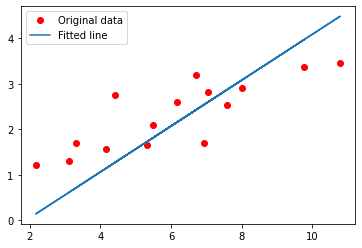

In [65]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')